In [2]:
# For simplicity, let's use sklearn data for this.  
#  Choices can be found [here](https://scikit-learn.org/stable/datasets/index.html).
#  For classification data let's use wine data.
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

raw_data = datasets.load_wine()
X_data = MinMaxScaler().fit_transform(raw_data.data)
X_data = np.concatenate((np.asmatrix(X_data[:, 0]), np.asmatrix(X_data[:, 10])), axis=0).T

print(X_data.shape)
x_train, x_test, y_train, y_test = train_test_split(X_data, raw_data.target)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(178, 2)
(133, 2)
(133,)
(45, 2)
(45,)


In [3]:
# What are the best pairs?
# 0,6
# 0,8
# 0,10
# 0,11
# 10,12
#11,12
# and the names of the columns:
# 0  Alcohol
# 1  Malic acid
# 2  Ash
# 3  Alcalinity of ash
# 4  Magnesium
# 5  Total phenols
# 6  Flavanoids
# 7  Nonflavanoid phenols
# 8  Proanthocyanins
# 9  Color intensity
# 10 Hue
# 11 OD280/OD315 of diluted wines
# 12 Proline


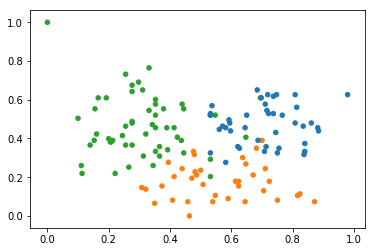

In [8]:
# Let's plot the data
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# scatter plot 
#plt.scatter(np.squeeze(np.asarray(x_train[:,0])), np.squeeze(np.asarray(x_train[:,1])), c=y_train, s=5)

# map color to target values (y_train)
color = np.array(['C0', 'C2', 'C1'])[y_train]

plt.scatter(np.squeeze(np.asarray(x_train[:,0])), np.squeeze(np.asarray(x_train[:,1])), c=color, s=20)
plt.show()

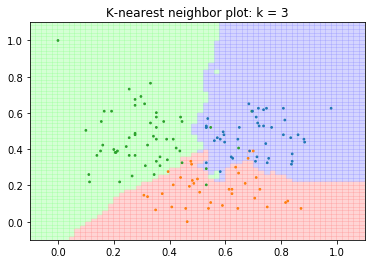

In [9]:

def decisionBoundary(model, ax):
    x_min, x_max = -0.1, 1.1
    y_min, y_max = -0.1, 1.1
    h = .02  # step size in the mesh

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['#AAAAFF', '#AAFFAA', '#FFAAAA'])
    
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.5)

    return ax
    
# example using KNN
from sklearn.neighbors import KNeighborsClassifier

f, ax = plt.subplots()

k=3

model1 = KNeighborsClassifier(k, 'uniform').fit(x_train, y_train)

ax.set_title("K-nearest neighbor plot: k = {}".format(k))

ax = decisionBoundary(model1, ax)
ax.scatter(np.squeeze(np.asarray(x_train[:,0])), np.squeeze(np.asarray(x_train[:,1])), c=color, s=3)

plt.show()

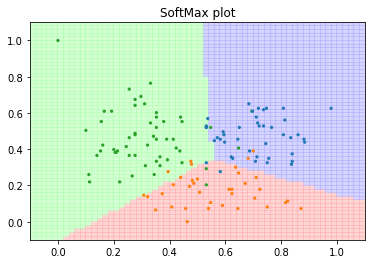

In [11]:
# another example using softmax
from sklearn.linear_model import LogisticRegression

f, ax = plt.subplots()

model2 = LogisticRegression(solver='lbfgs', multi_class='multinomial', penalty='l2').fit(x_train, y_train)

ax.set_title("SoftMax plot")

ax = decisionBoundary(model2, ax)
ax.scatter(np.squeeze(np.asarray(x_train[:,0])), np.squeeze(np.asarray(x_train[:,1])), c=color, s=5)

plt.show()

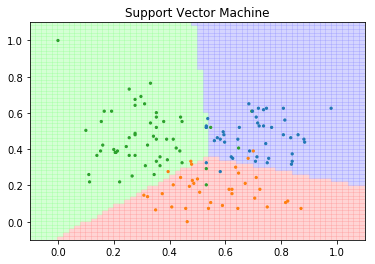

In [12]:
# kernel method
from sklearn.svm import SVC

f, ax = plt.subplots()

model3 = SVC(gamma='auto', kernel='linear').fit(x_train, y_train)

ax.set_title("Support Vector Machine")

ax = decisionBoundary(model3, ax)
ax.scatter(np.squeeze(np.asarray(x_train[:,0])), np.squeeze(np.asarray(x_train[:,1])), c=color, s=5)

plt.show()

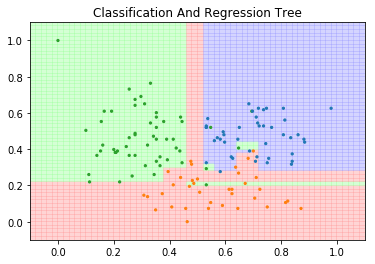

In [13]:
# CART classifier
from sklearn.tree import DecisionTreeClassifier

f, ax = plt.subplots()

model4 = DecisionTreeClassifier().fit(x_train, y_train)

ax.set_title("Classification And Regression Tree")

ax = decisionBoundary(model4, ax)
ax.scatter(np.squeeze(np.asarray(x_train[:,0])), np.squeeze(np.asarray(x_train[:,1])), c=color, s=5)

plt.show()

In [14]:
# now we will create a procedure for the scatterplot as well as it is boilerplate code
def plot_points(ax, x_train, y_train, title = None):
    if title is not None:
        ax.set_title(title)
    # map color to target values (y_train)
    color = np.array(['C0', 'C2', 'C1'])[y_train]
    ax.scatter(np.squeeze(np.asarray(x_train[:,0])), np.squeeze(np.asarray(x_train[:,1])), c=color, s=5)
    return ax

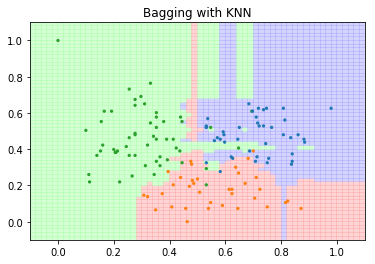

In [15]:
# Ensemble methods - first, bagging
from sklearn.ensemble import BaggingClassifier

model5 = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5).fit(x_train, y_train)
f, ax = plt.subplots()

ax = decisionBoundary(model5, ax)
ax = plot_points(ax, x_train, y_train, "Bagging with KNN")

plt.show()

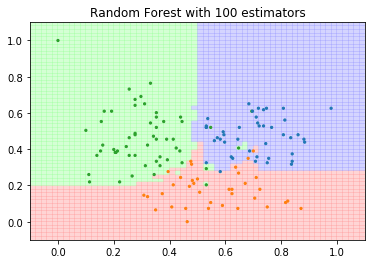

In [16]:
# Random Forest ensemble
from sklearn.ensemble import RandomForestClassifier
estimators = 100
model6 = RandomForestClassifier(n_estimators=estimators).fit(x_train, y_train)

f, ax = plt.subplots()

ax = decisionBoundary(model6, ax)
ax = plot_points(ax, x_train, y_train, "Random Forest with {} estimators".format(estimators))

plt.show()

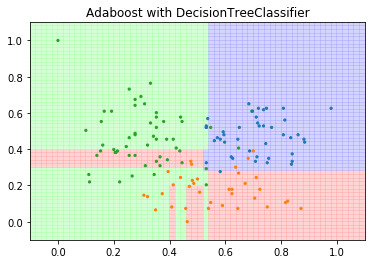

In [17]:
# Adaboost ensemble
from sklearn.ensemble import AdaBoostClassifier

model7 = AdaBoostClassifier().fit(x_train, y_train)
f, ax = plt.subplots()

ax = decisionBoundary(model7, ax)
ax = plot_points(ax, x_train, y_train, "Adaboost with DecisionTreeClassifier")

plt.show()